In [1]:
!git clone https://github.com/icomse/5th_workshop_MachineLearning.git
import os
os.chdir('5th_workshop_MachineLearning/data')
data_dir = os.getcwd()

Cloning into '5th_workshop_MachineLearning'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 203 (delta 34), reused 26 (delta 14), pack-reused 156
Receiving objects: 100% (203/203), 99.50 MiB | 23.91 MiB/s, done.
Resolving deltas: 100% (91/91), done.
Updating files: 100% (45/45), done.


In [2]:
import torch
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

torch.manual_seed(44)

plt.style.use(os.path.join(data_dir, 'configs', 'plot_style.mplstyle'))

# **Hands-on**: Consider this computational graph. Do the following (without using torch):

![image](images/graph.png)

## Guidelines
- write a function for each gate in the graph (`f1`, `f2`, `f3`)
  - `f1` = addition gate
  - `f2` = multiplication gate
  - `f3` = exponentional gate
- write a function that makes a forward pass through the graph
  - print the result for two cases:
    - *case 1*: a = 1, b = 2, d = 3
    - *case 2*: a = [-1, 1, -1, 1], b = [2, 2, 2, 2], d = [0, 0, 3, 3]


In [3]:
# your code here

In [4]:
# STOP!

# **Hands-on**: Now write functions to compute the local gradients and make a backward pass

In [6]:
# your code here

In [7]:
# STOP!

# **Hands-on**: Do some parameter updates:

## Guidelines:
- Let's update `a` to minimize `z` using a gradient descent procedure
- Write a function that performs explicit updates with a learning rate of 10^-4
- start with a = 1, b = 2, d = 3 and make one step. What's the new `a` value?

In [9]:
# your code here

In [10]:
# STOP!

# **Hands-on**: Now perform 1000 paramater updates for three cases:

## Guidelines
- Cases:
  - case 3: a, b, d = [1, 0, 1]; learning rate = 1e-4
  - case 4: a, b, d = [1, 0, 1]; learning rate = 1e-2
  - case 5: a, b, d = [1, 0, 0]; learning rate = 1e-2
- plot the evolution of `z` w/ each update for the three cases
- which case is most succssful? least successful?
- how does learning rate make case 4 different from case 3?
- what's happening with case 5?

In [12]:
# your code here

In [13]:
# STOP!

# Now with `torch` ! First, a brief intro to tensors



![image](images/tensor.png)

![image](images/pytorch_tensor.jpeg)

In [15]:
x = torch.ones((3,))

In [16]:
x

tensor([1., 1., 1.])

In [17]:
x.requires_grad

False

In [18]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)

In [19]:
x

tensor([0., 1., 2.], requires_grad=True)

In [20]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()

y

tensor(12.6667, grad_fn=<MeanBackward0>)

In [21]:
y.backward()

In [22]:
y

tensor(12.6667, grad_fn=<MeanBackward0>)

# **Hands-on**: Compute dy/dx by hand (ie with pen/paper)

## Hints:
- your answer should be three values because x is three values

# Now with torch

In [23]:
x.grad

tensor([1.3333, 2.0000, 2.6667])

# Let's see how (nonlinear) activation functions enable us to fit nonlinearities

$y = \frac{\sin(5 \pi x)}{5 \pi x e^{3x} }$


# Let's make a 1D nonlinear function to learn with our linear NN

In [24]:
def nonlinear_func(x):
    return np.sin(5*np.pi*x) / (5*np.pi*x) / np.exp(3*x)

# And some training data

In [25]:
x_train = np.linspace(-1, 1, 1000)
y_train = nonlinear_func(x_train)

# Fit the linear model

In [26]:
lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train)
y_pred_sklearn = lr.predict(x_train.reshape(-1, 1))

# Plot

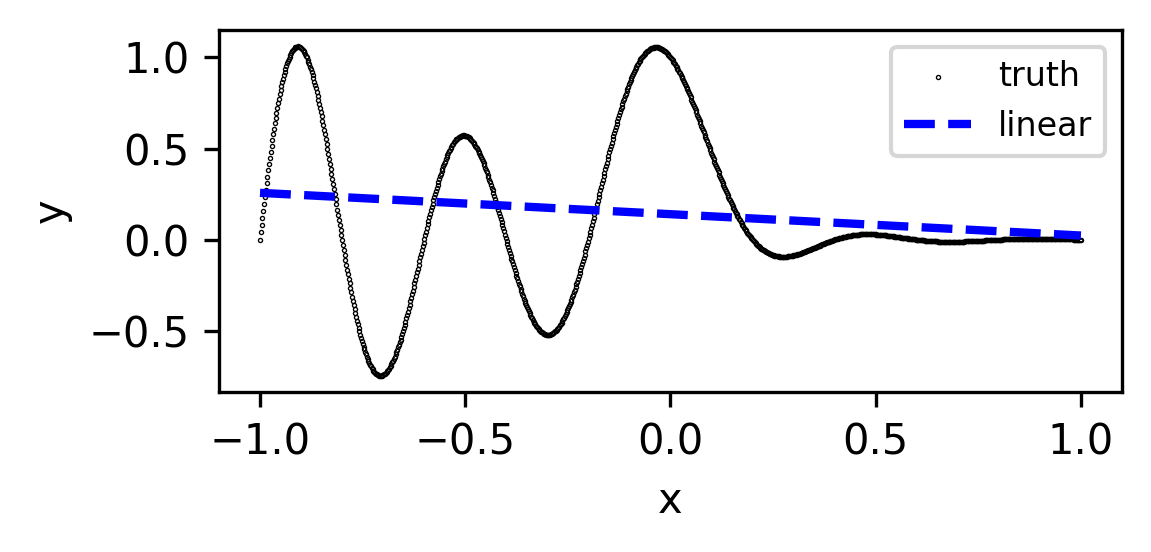

In [27]:
fig = plt.figure()
ax = plt.subplot(111)
ax = plt.scatter(x_train, y_train, color='white', edgecolor='black', label='truth', s=.1, marker='o')
ax = plt.plot(x_train, y_pred_sklearn, color='blue', ls='--', label='linear')
ax = plt.xlabel('x')
ax = plt.ylabel('y')
ax = plt.legend()

# Now, let's try a neural network with one 50-neuron hidden layer, and linear activation

In [28]:
class LinearNet(torch.nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()

        # Layer 1: 1 input --> 50 outputs
        self.fc1 = torch.nn.Linear(1, 50)

        # Layer 2 (hidden): 50 inputs --> 50 outputs
        self.fc2 = torch.nn.Linear(50, 50)

        # Layer 3: 50 inputs --> 1 output
        self.fc3 = torch.nn.Linear(50, 1)

    def forward(self, x):

        # Now, we'll specify the activation following each layer
        # In this case our activation will be linear with a slope of 1 and no bias (f(x) = 1*x + 0)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


In [29]:
def train_model(x_train, y_train, model, num_epochs=100, learning_rate=0.01, batch_size=8):
    """
    Args:
      x_train (1d-array)
        independent variable

      y_train (1d-array)
        dependent variable
        x_train and y_train should be the same length

      model (torch.nn.Module)
        a neural network

      num_epochs (int)
        how many epochs you want to train for

      learning_rate (float)
        learning rate for your optimizer

      batch_size (int)
        how many samples per batch

    Returns:
      trained model (torch.nn.Module)
    """

    # turn our x_train and y_train into tensors
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).float())

    # connect the features and target for each data point and lump into batches
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

    # what loss function will we optimize
    loss_fn = torch.nn.MSELoss()

    # how will we optimize it
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # each epoch is a training pass through all my data
    for epoch in range(num_epochs):
        running_loss = 0.0

        # we make parameter updates on each batch
        for inputs, labels in train_dataloader:
            optimizer.zero_grad()

            # what does our model predict with the current parameters
            outputs = model(inputs.unsqueeze(1))

            # what's the loss
            loss = loss_fn(outputs, labels.unsqueeze(1))

            # use backpropagation to figure out how to update the weights
            loss.backward()

            # make a parameter update
            optimizer.step()

            # keep track of the total loss
            running_loss += loss.item()

    # OK, done training, let's return our model
    return model



# Let's train!

In [30]:
linear_net = train_model(x_train, y_train, LinearNet(), num_epochs=100, learning_rate=0.01, batch_size=8)


# Now evaluate and plot

In [31]:
y_pred_linearnet = linear_net(torch.tensor(x_train).float().unsqueeze(1)).squeeze(1).detach().numpy()



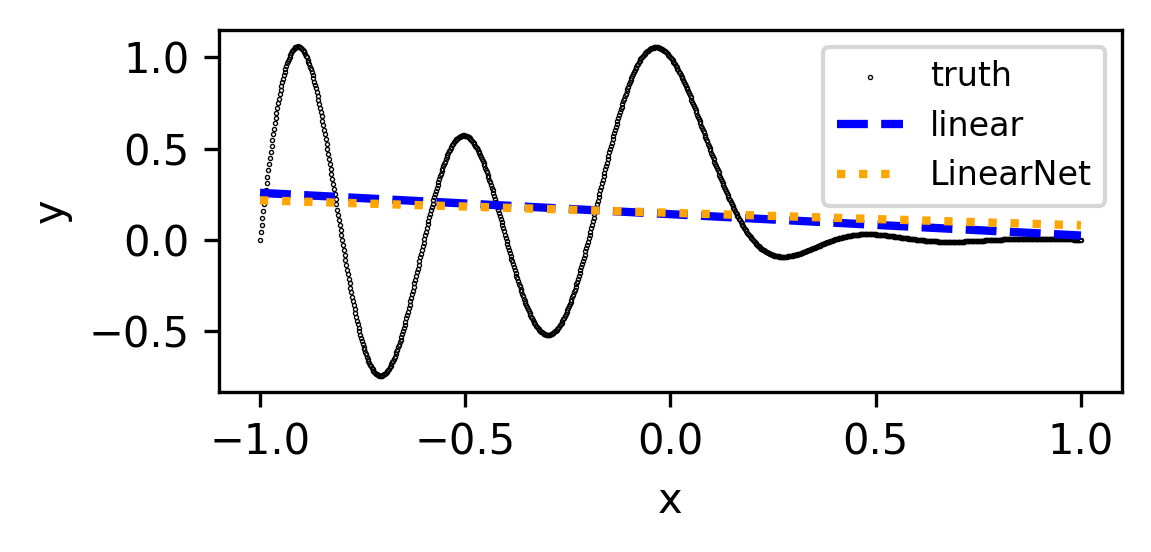

In [32]:
fig = plt.figure()
ax = plt.subplot(111)
ax = plt.scatter(x_train, y_train, color='white', edgecolor='black', label='truth', s=.1, marker='o')
ax = plt.plot(x_train, y_pred_sklearn, color='blue', ls='--', label='linear')
ax = plt.plot(x_train, y_pred_linearnet, color='orange', ls=':', label='LinearNet')
ax = plt.xlabel('x')
ax = plt.ylabel('y')
ax = plt.legend()

# LinearNet collapses (basically) to linear regression!

# Now, we'll use a nonlinear activation function (ReLU) and see how it goes

In [33]:
class NonLinearNet(torch.nn.Module):
    def __init__(self):

        super(NonLinearNet, self).__init__()

        # Layer 1: 1 input --> 50 outputs
        self.fc1 = torch.nn.Linear(1, 50)

        # Layer 2 (hidden): 50 inputs --> 50 outputs
        self.fc2 = torch.nn.Linear(50, 50)

        # Layer 3: 50 inputs --> 1 output
        self.fc3 = torch.nn.Linear(50, 1)

        # Define your nonlinear activation here
        self.relu = torch.nn.ReLU()


    def forward(self, x):

        # Now, we'll specify the activation following each layer
        # In this case our activation will be ReLU (f(x) = (max(0, x))

        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Now train, predict, and plot

In [34]:
nonlinear_net = train_model(x_train, y_train, NonLinearNet(), num_epochs=100, learning_rate=0.01, batch_size=8)
y_pred_nonlinearnet = nonlinear_net(torch.tensor(x_train).float().unsqueeze(1)).squeeze(1).detach().numpy()


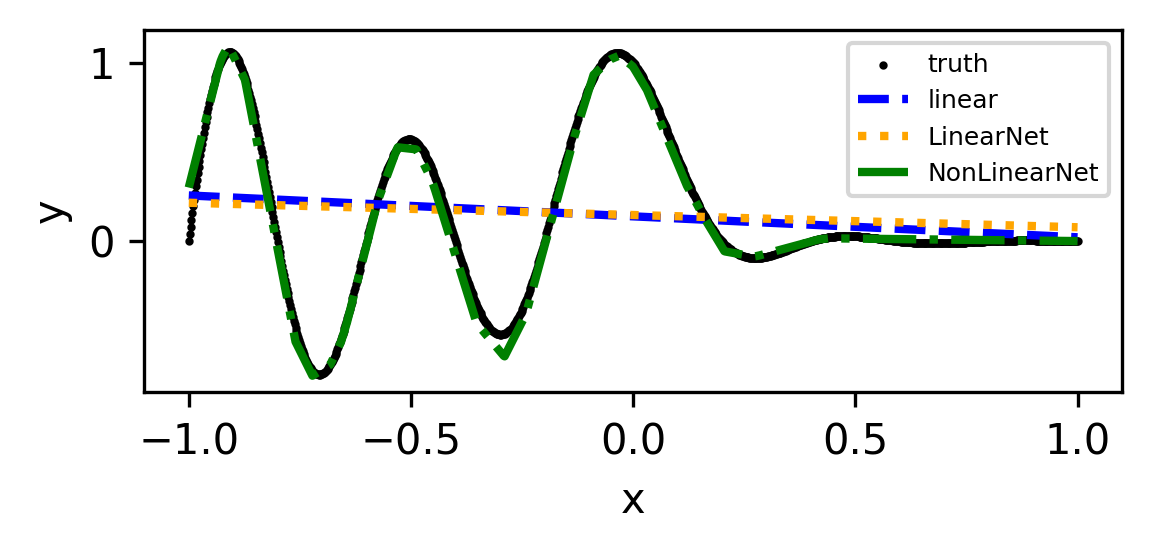

In [35]:
fig = plt.figure()
ax = plt.subplot(111)
ax = plt.scatter(x_train, y_train, color='white', edgecolor='black', label='truth', s=1, marker='o')
ax = plt.plot(x_train, y_pred_sklearn, color='blue', ls='--', label='linear')
ax = plt.plot(x_train, y_pred_linearnet, color='orange', ls=':', label='LinearNet')
ax = plt.plot(x_train, y_pred_nonlinearnet, color='green', ls='-.', label='NonLinearNet')
ax = plt.xlabel('x')
ax = plt.ylabel('y')
ax = plt.legend(fontsize=6)